In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load the data
purchases = pd.read_csv("./data/purchases.csv")
crm = pd.read_csv("./data/crm_export.csv")
customer = pd.read_csv("./data/customer_database.csv")

In [4]:
purchases.shape

(71519, 11)

In [6]:
#check for missing data per column 
purchases.isnull().sum()


#there are 18448 missing customer_ids and 53071 missing guset values which is 71519 total whcih is the total rows in the dataset

event_time              0
product_id              0
category_id             0
category_code       16739
brand                5707
price                   0
session_id              0
customer_id         18448
guest_first_name    53071
guest_surname       53071
guest_postcode      53071
dtype: int64

In [7]:
purchases["is_guest"] = purchases["customer_id"].isnull()

In [11]:
#the guest checkouts and the customer Ids are assumed to be mutually exclusive
purchases[purchases["is_guest"] & purchases["customer_id"].notnull()]
purchases[(purchases["is_guest"] ==False) & purchases["customer_id"].isnull()]


,event_time,product_id,category_id,category_code,brand,price,session_id,customer_id,guest_first_name,guest_surname,guest_postcode,is_guest


In [ ]:
#we can see that all rows are either a guest check out or a purchase made by a registered customer

In [ ]:
#what percentage of records are guests checkouts

In [13]:
purchases["is_guest"].value_counts(normalize=True)

#this tells us the 25% of the ros are guest checkouts 
#one row represents a purchases item not a customer record, so the proportion of customers who checked out as guests is NOT 25%

is_guest
False    0.742055
True     0.257945
Name: proportion, dtype: float64

In [22]:
#the actual proportion is 
guest_columns = ["guest_first_name", "guest_surname", "guest_postcode"]
unique_guests= purchases[guest_columns].drop_duplicates() #get unique combination of guest columns
print(len(unique_guests))
unique_customers= purchases["customer_id"].unique() #get all unique customer IDs
cust_total = len(unique_customers) + len(unique_guests)
print(len(unique_guests) / (cust_total-1)) #subtract 1 from the unique customer count becuase NULL ius also counted

8301
0.2495640671036017


In [ ]:
#there are 8301 unique combinations of guests 

In [4]:
#get head of purchases
purchases.head()

,event_time,product_id,category_id,category_code,brand,price,session_id,customer_id,guest_first_name,guest_surname,guest_postcode
0,2022-10-01 02:26:08+00:00,32701106,2055156924466332447,NaN,shimano,95.21,64c68405-7002-4ce0-9604-a4c2e1f7384b,NaN,MICHAEL,MASON,RG497ZQ
1,2022-10-01 02:28:32+00:00,9400066,2053013566067311601,NaN,jaguar,164.20,3b7d6741-3c82-4c75-8015-6f54b52612e0,7466.0,NaN,NaN,NaN
2,2022-10-01 02:31:01+00:00,1004238,2053013555631882655,electronics.smartphone,apple,1206.40,38c6d3f7-6c32-4fed-bca6-ef98e1746386,NaN,COLE,WILKINSON,SW75TQ
3,2022-10-01 02:33:31+00:00,11300059,2053013555531219353,electronics.telephone,texet,17.48,3398c966-7846-4186-89be-323daad735b9,NaN,MOHAMMED,RICHARDS,RG150RE
4,2022-10-01 02:40:18+00:00,17300751,2053013553853497655,NaN,versace,77.22,11e3a573-01b9-4794-b513-e7d8a4fcac83,31266.0,NaN,NaN,NaN


In [5]:
crm.head()

,customer_id,first_name,surname,postcode,age
0,29223,Holly,Rogers,LS475RT,12
1,27826,Daniel,Owen,M902XX,5
2,7432,Eleanor,Russell,HR904ZA,34
3,2569,Paige,Roberts,DE732EP,61
4,9195,Matilda,Young,LS670FU,78


In [6]:
customer.head()

,customer_id,first_name,surname,postcode,age
0,1641,Rhys,Richards,DE456EZ,45
1,24796,Maisie,Young,SW433XX,16
2,14358,Nathan,King,NW49TU,58
3,15306,Jack,Moore,NW908RR,26
4,24971,Alexander,Roberts,SW500HW,85


Exploratory Analysis

Questions to ask for exploratory analysis
- Do the values make sense?
- Are the guest details complete when we don't have customer ID?
- Does the price column have any outliers or unrealistic values?
- Are the date and time values all within the same period?
- Is there anything odd with the post code values?
- Are there duplicated in the data?
- Where can we join tables?

In [14]:
#check dtype and change dtype to dateime if not already
purchases["event_time"].dtype

dtype('O')

In [15]:
#convert to datetime dtype
purchases["event_time"] = pd.to_datetime(purchases["event_time"], errors = "coerce")

In [17]:
#check for parsing failures
failded_parses = purchases["event_time"].isna().sum()

In [9]:
#looking at date time for purchases
#check min and max
#
purchases["event_time"].max(), purchases["event_time"].min()

('2022-10-31 23:55:13+00:00', '2022-10-01 02:26:08+00:00')

In [21]:
#date range sanity check 
(purchases["event_time"].max() - purchases["event_time"].min()).days

30

In [22]:
#check for duplicates
purchases["event_time"].duplicated().sum()

np.int64(1376)

<Axes: >

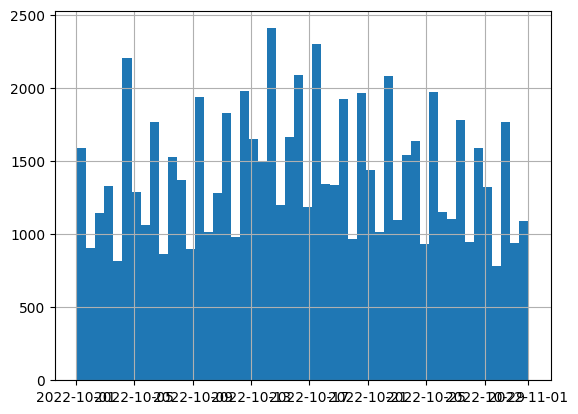

In [28]:
#plot values 
purchases['event_time'].hist(bins=50)

<Axes: xlabel='event_time'>

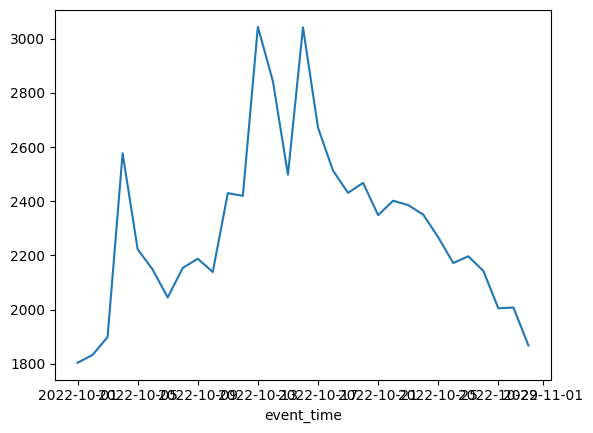

In [29]:
purchases.groupby(purchases['event_time'].dt.date).size().plot(kind='line')
